# Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#mnist
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
x,y=mnist["data"],mnist["target"]

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [9]:
some_digit = x.to_numpy()[36003] #this is only one image that will have 784 pixel data in an array.
some_digit_image = np.reshape(some_digit,(28,28))

In [10]:
some_digit.shape

(784,)

In [11]:
some_digit_image.shape #I have changed the whole array into 28X28 2D array to plot it as an image...that's it 

(28, 28)

In [12]:
some_digit_image # 28 X 28 ---> 2darray

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

(-0.5, 27.5, 27.5, -0.5)

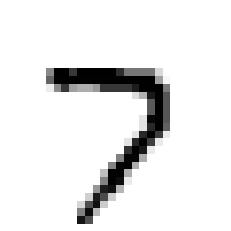

In [13]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [14]:
y[36003]

'7'

In [15]:
x_train = x[:60000]
x_test = x[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [16]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.to_numpy()[shuffle_index], y_train.to_numpy()[shuffle_index]

# Creating a 2 detector

In [17]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train_2 = (y_train==7) #if 2 then it will show true else everything will be false here 36001th index is true only
y_test_2 = (y_test==7)

In [18]:
y_train

array([0, 3, 2, ..., 3, 3, 3])

In [19]:
y_train_2
y_test_2

60000     True
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [20]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [21]:
clf = KNeighborsClassifier(n_neighbors=3)

In [22]:
clf.fit(x_train,y_train_2)

KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.predict([some_digit])

array([ True])

# Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

In [26]:
a.mean()

0.9937666666666667

In [27]:
import pickle

In [28]:
data = {"model" : clf}
with open('steps.pkl','wb') as file:
  pickle.dump(data,file)

In [29]:
with open('steps.pkl','rb') as file:
  data = pickle.load(file)

In [30]:
clf_loaded = data["model"]

In [31]:
y_pred = clf.predict([some_digit])
y_pred

array([ True])